# Keras 개발 Process

1. 입력 텐서(X)와 출력 텐서(y)로 이뤄진 **훈련 데이터를 정의**

2. 입력과 출력을 연결하는 Layer(층)으로 이뤄진 **네트워크(모델)을 정의**
    - Sequential 방식: 순서대로 쌓아올린 네트워크로 이뤄진 모델을 생성하는 방식
    - Functional API 방식: 다양한 구조의 네트워크로 이뤄진 모델을 생성하는 방식
    - Subclass 방식: 네트워크를 정의하는 클래스를 구현.
    

3. **모델 Compile(컴파일)**
    - 모델이 Train(학습)할때 사용할 손실함수(Loss Function), 최적화기법(Optimizer), 학습과정을 모니터링할 평가지표(Metrics)를 설정
    
    > Compile: 실행할 수 있는 상태로 만들어 주는 것.

4. **Training(학습/훈련)**
    - Train dataset을 이용해 모델을 Train 시킨다.

# MNIST 이미지 분류 
- ### [MNIST](https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4)(Modified National Institute of Standards and Technology) database
- 흑백 손글씨 숫자 0-9까지 10개의 범주로 구분해놓은 데이터셋
- 하나의 이미지는 28 * 28 pixel 의 크기
- 6만개의 Train 이미지와 1만개의 Test 이미지로 구성됨.

##### import

In [9]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

##### MNIST dataset Loading

In [5]:
(train_image, train_label), (test_image, test_label) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [7]:
train_image.shape, train_label.shape, test_image.shape, test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

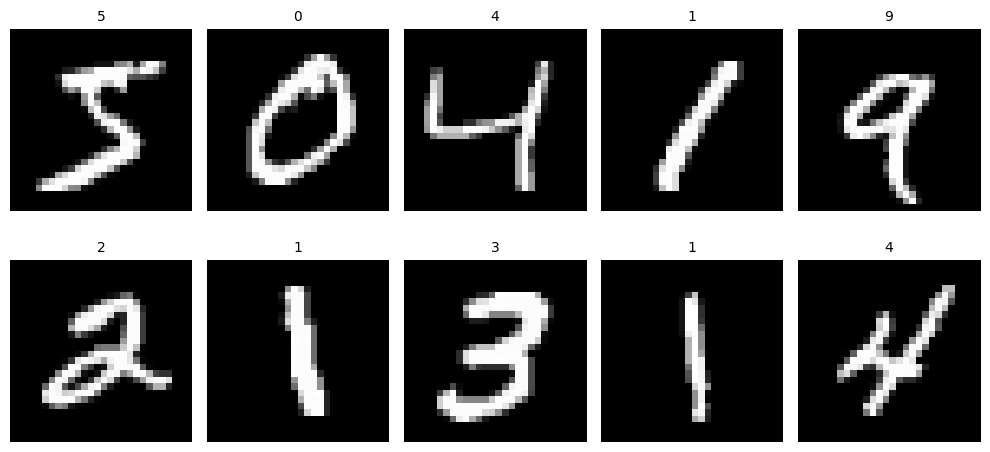

In [11]:
# 이번에는 X data를 확인해보자. 즉 영상을 확인해보는 것이다. matplotlib을 이용해 그려보자.
plt.figure(figsize = (10, 5))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(train_image[i], cmap = 'gray')
    plt.title(f'{train_label[i]}', fontsize = 10)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [12]:
train_image[0].min(), train_image[0].max()

(0, 255)

## 데이터 준비
- X (Input Data Image)
    - 0 ~ 1 사이의 값으로 정규화 시킨다.
- y (Output Data)
    - one hot encoding 처리
        - Label이 다중분류(Multi class classification)일 경우 One Hot Encoding 한다.
            - 딥러닝 모델이 각 Label별 확률을 출력하도록 정의 되기 때문에 y(정답)도 같은 형태로 만들어 줘야 한다.
    - Keras의 onehot encoding 처리 함수
        - tensorflow.keras.utils.to_categorical()

##### input image(X)를 정규화. 
- 이미지를 0 ~ 1 로 정규화 하고 타입을 float32로 변환

In [ ]:
# 영상 data를 모두 scaling해준다. 이때 MinMax Scaling을 하는데 굳이 MinMaxScaler를 만들 필요가 없다.
# 어차피 모든 영상 data의 값이 0 ~ 255이기 때문이다. 그래서 data를 255로 나누면 최소값은 0, 최대값은 1로 minmax scaling될 것이다.
# 그리고 dtype을 uint8에서 float32로 바꿔준다.

In [13]:
X_train = train_image.astype('float32') / 255
X_test = test_image.astype('float32') / 255

##### label(y)를 one hot encoding

In [ ]:
# label을 모두 one-hot encoding 처리한다.
# 왜 label을 one-hot encoding하는 것일까?
# Deep Learning의 classification model은 입력이 각 label이 될 수 있는 확률을 출력해준다.
# 그리고 실제 정답과 추론 결과의 오차를 계산해 오차를 줄이는 방향으로 학습이 진행된다.
# 이로 인해 정답의 확률을 알려줘야 한다. 그래서 label을 one-hot encoding 처리한다.
# keras에서 one-hot encoding하는 방법은 아래와 같다. 아래의 함수를 사용하면 one-hot encoding을 처리해준다.

In [15]:
y_train = keras.utils.to_categorical(train_label)
y_test = keras.utils.to_categorical(test_label)

In [ ]:
# 기존 y data와 one-hot encoding된 y data를 비교해보자.

In [16]:
train_label[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [17]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## 네트워크(모델) 정의
- Network : 전체 모델 구조

In [ ]:
# 비어있는 network를 만든다.

In [26]:
model = keras.Sequential()

In [27]:
# 비어있는 network에 layer들을 추가한다. 이것이 layer를 쌓는 과정이다.
# 각 layer는 이전 layer의 출력 결과를 입력으로 받아서 처리한 뒤에 출력한 후 다음 layer에 값을 전달한다.
# 더 이상 다음으로 보낼 layer가 없으면 그 때의 출력 결과가 netwokr의 최종 결과가 된다.
# layer는 unit들로 구성되어 있다. unit이 실제로 feature들을 입력받아서 처리해 출력하는 함수이다.

# 첫 번째 layer를 추가해보자. 첫 번째 layer는 InputLayer를 추가한다. 이는 입력을 받는 layer이다.
# 정확하게는 입력 data의 shape을 설정하는 역할이다. 실질적으로 data의 특징을 찾고 결과를 추론하는 역할은 하지 않는다.
# 여기서는 28 X 28의 영상 data를 사용하므로 (28, 28)을 입력해 입력 data의 shape을 알려준다.
# layer를 추가할 때는 Sequential class로 생성한 instance의 add() method를 사용한다.
model.add(keras.layers.InputLayer((28, 28)))

# 두 번째 layer를 추가한다. 두 번째 layer는 Flatten이다. 이는 입력받은 data를 1차원 배열로 변환하는 역할을 한다.
# 여기서는 하나의 data가 784(28*28)개의 값들로 구성되게 바꾸는 것이다.
model.add(keras.layers.Flatten())

# 세 번째 layer를 추가한다. 세 번째 layer는 Dense이다. 이는 특정 역할을 하는 unit으로 구성된 layer를 만드는 것이다.
# layer의 종류마다 생성하는 unit의 종류가 다르다. Dense layer는 linear regression을 처리하는 unit을 생성하는 것이다.
# linear regression을 처리하는 unit 256개로 구성된 layer를 만들어보자.
# 위의 data를 모두 256개의 unit으로 입력한다. 그리고 각각의 unit을 값을 처리해 출력한다.
model.add(keras.layers.Dense(units = 256))

# 네 번째 layer를 추가한다. 네 번째 layer는 ReLU이다. 이는 입력 값과 0을 비교해 더 큰 값을 출력해준다.
# 즉 입력 값이 음수이면 0을 출력하는 것이다.
# 이와 같은 함수를 activation 함수라고 한다. activation 함수는 non-linear regression 함수를 사용해야 한다.
# 위의 unit에서 출력된 값을 모두 받아서 처리한다.
model.add(keras.layers.ReLU())

# 다섯 번째 layer를 추가한다. 다섯 번째 layer는 Dense이다.
model.add(keras.layers.Dense(units = 128))

# 여섯 번째 layer를 추가한다. 여섯 번째 layer는 ReLU이다.
model.add(keras.layers.ReLU())

# 일곱 번째 layer를 추가한다. 일곱 번째 layer는 Dense이다.
model.add(keras.layers.Dense(units = 10))

# 여덟 번째 layer를 추가한다. 여덟 번째 layer는 Softmax이다. 이는 output layer이다.
# 입력받은 값들을 확률로 만들어 출력해준다.
# network의 최종 결과를 출력하는 layer이다.
model.add(keras.layers.Softmax(name = 'ouput'))


# Dense의 unit 수를 줄이는 이유는 출력 값을 줄여나가기 위해서다. 최종적으로 10개로 unit 수를 줄였는데 이로 인해 최종
# 출력 값의 수는 10개가 될 것이다. 우리가 label을 one-hot encoding 처리한 이유가 이것 때문이다.
# Deep Learning network로부터 출력된 10개의 확률과 label에 있는 10개의 확률을 비교해 가장 가능성 있는 것으로 label을 설정하는 것이다.

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 re_lu_4 (ReLU)              (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 re_lu_5 (ReLU)              (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
 ouput (Softmax)             (None, 10)               

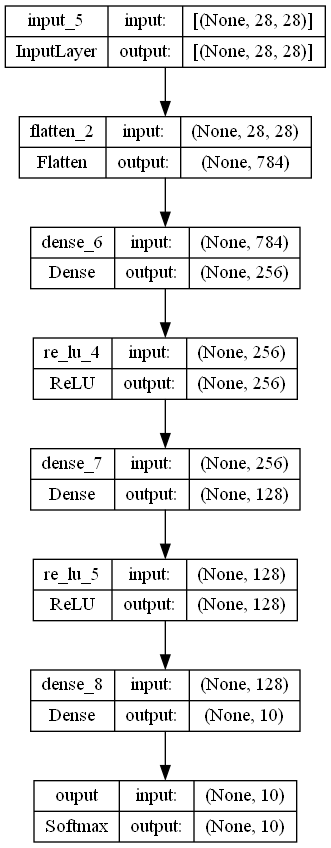

In [34]:
keras.utils.plot_model(model, show_shapes = True, to_file = 'my_model.png')

## 컴파일 단계
- 정의된 딥러닝 모델을 학습할 수 있는 상태로 만들어 주기 위해 다음을 추가적으로 설정 한다.
    - Optimizer
    - 손실함수
    - 평가지표

In [35]:
# optimizer는 adam을 사용한다. 보통 adam을 사용한다. loss function은 categorical_crossentropy를 설정한다.
# metrics는 학습 로그와 network을 평가할 때 loss function이 계산한 오차와 같이 출력되는 evaluation index이다.
# 성능을 확인하기 위해 사용하는 것이다. metrics는 선택 가능하다.
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

## 학습 (fit)
- model.fit()
    - 모델 학습 메소드. 
    - 학습과정의 Log를 History 객체로 반환한다.
- History : train 시 에폭별 평가지표값들을 모아서 제공.    

In [41]:
history = model.fit(X_train, y_train, 
                    epochs = 10, 
                    batch_size = 100, 
                    validation_split = 0.3)

Epoch 1/10
420/420 [==============================] - 3s 6ms/step - loss: 0.3020 - accuracy: 0.9145 - val_loss: 0.1653 - val_accuracy: 0.9522
Epoch 2/10
420/420 [==============================] - 2s 5ms/step - loss: 0.1181 - accuracy: 0.9647 - val_loss: 0.1224 - val_accuracy: 0.9648
Epoch 3/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0767 - accuracy: 0.9769 - val_loss: 0.1021 - val_accuracy: 0.9696
Epoch 4/10
420/420 [==============================] - 2s 6ms/step - loss: 0.0523 - accuracy: 0.9839 - val_loss: 0.1072 - val_accuracy: 0.9671
Epoch 5/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0388 - accuracy: 0.9879 - val_loss: 0.1072 - val_accuracy: 0.9696
Epoch 6/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.1043 - val_accuracy: 0.9702
Epoch 7/10
420/420 [==============================] - 2s 5ms/step - loss: 0.0208 - accuracy: 0.9936 - val_loss: 0.0999 - val_accuracy: 0.9732
Epoch 

##### History 시각화

In [43]:
print(type(history))

<class 'keras.callbacks.History'>


In [44]:
print('학습 epoch list:', history.epoch)
print('epoch 수와 epoch 당 step 수:', history.params)

학습 epoch list: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
epoch 수와 epoch 당 step 수: {'verbose': 1, 'epochs': 10, 'steps': 420}


In [45]:
history.history

{'loss': [0.301982581615448,
  0.11813441663980484,
  0.07666172832250595,
  0.052278559654951096,
  0.03883632272481918,
  0.02999883145093918,
  0.020760908722877502,
  0.01515311561524868,
  0.01618179865181446,
  0.013844050467014313],
 'accuracy': [0.9144523739814758,
  0.9646904468536377,
  0.9768571257591248,
  0.9838809370994568,
  0.9878809452056885,
  0.9908333420753479,
  0.9935952425003052,
  0.9956190586090088,
  0.9948095083236694,
  0.9955238103866577],
 'val_loss': [0.16531220078468323,
  0.12244115024805069,
  0.10214415192604065,
  0.10720270872116089,
  0.10720010846853256,
  0.10432559251785278,
  0.09993544965982437,
  0.12008748203516006,
  0.11092406511306763,
  0.11621467769145966],
 'val_accuracy': [0.9522222280502319,
  0.9647777676582336,
  0.9695555567741394,
  0.9670555591583252,
  0.9696111083030701,
  0.9701666831970215,
  0.9731666445732117,
  0.9701111316680908,
  0.972000002861023,
  0.9738888740539551]}

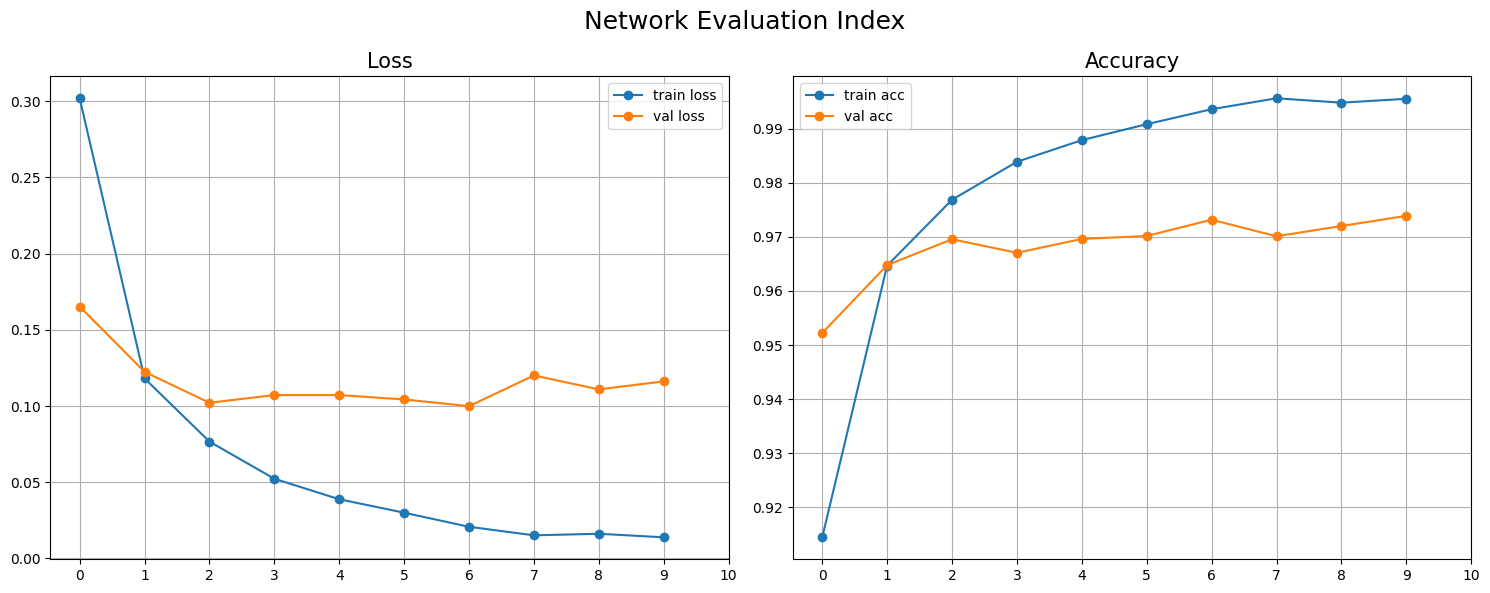

In [63]:
plt.figure(figsize = (15, 6))
plt.suptitle('Network Evaluation Index', fontsize = 18)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'train loss', marker = 'o')
plt.plot(history.history['val_loss'], label = 'val loss', marker = 'o')
plt.title('Loss', fontsize = 15)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'train acc', marker = 'o')
plt.plot(history.history['val_accuracy'], label = 'val acc', marker = 'o')
plt.title('Accuracy', fontsize = 15)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 테스트셋 평가

In [64]:
result = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9776


In [65]:
result

[0.0885714590549469, 0.9775999784469604]

## 새로운 데이터 추론
- 새로운 데이터를 추론하기 전에 학습데이터에 했던 전처리과정을 동일하게 적용 한 뒤 추론한다.

### 추론 메소드
- predict()
    - **분류:** 각 클래스 별 확률 반환
    - **회귀:** 최종 예측 결과
- 분류문제일때 predict() 결과에서 class label 출력하기    
    - 이진 분류(binary classification)
        - `numpy.where(model.predict(x) > 0.5, 1, 0).astype("int32")`
    - 다중클래스 분류(multi-class classification)
        - `numpy.argmax(model.predict(x), axis=1)`

In [77]:
X_new = X_test[:3]

In [78]:
pred = model.predict(X_new)

1/1 [==============================] - 0s 21ms/step


In [68]:
print(pred.shape)
pred

(3, 10)


array([[8.7999377e-09, 7.3348336e-09, 2.3698199e-07, 9.2377206e-07,
        6.9926114e-12, 3.0917666e-10, 1.3503952e-12, 9.9999785e-01,
        8.6146713e-08, 9.2212787e-07],
       [6.5487199e-12, 6.0667713e-07, 9.9999940e-01, 8.0308390e-12,
        4.1468708e-17, 5.7091769e-14, 6.8396343e-12, 4.4302569e-12,
        2.2141233e-11, 1.3858733e-17],
       [7.6998776e-07, 9.9945158e-01, 7.6786819e-06, 2.1238481e-08,
        6.1686183e-06, 1.7731452e-07, 6.1281767e-06, 5.1076326e-04,
        1.6727648e-05, 1.2980651e-07]], dtype=float32)

In [71]:
np.argmax(pred, axis = 1)

array([7, 2, 1], dtype=int64)

In [ ]:
# 실행 결과 첫 번째 data는 7, 두 번째 data는 2, 세 번째 data는 1이라는 것을 알 수 있다.

In [73]:
np.argmax(y_test[:3], axis = 1)

array([7, 2, 1], dtype=int64)

# TODO

1. OpenCV로 숫자 영상을 읽는다.
2. 28 X 28로 resize한다.
3. network를 이용해 추론한다.